# Partitioning

In [116]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [117]:
clean_9000 = 'result_clean_pdf_9000_files.csv'
clean_109 = 'result_clean_pdf_109_embed_video.csv'
malw_173 = 'result_malware_pdf_cve_sorted_173_files.csv'
malw_10982 = 'result_malware_pdf_pre_04-2011_10982_files.csv'
df_clean_9000 = pd.read_csv(clean_9000, sep=',')
df_clean_109 = pd.read_csv(clean_109, sep=',')
df_malw_173 = pd.read_csv(malw_173, sep=',')
df_malw_10982 = pd.read_csv(malw_10982, sep=',')

In [118]:
df_clean = pd.concat([df_clean_9000, df_clean_109], axis=0, ignore_index=True)
df_malw = pd.concat([df_malw_10982, df_malw_173], axis=0, ignore_index=True)

df_clean["malware"] = np.zeros(df_clean.shape[0], dtype='bool')
df_malw["malware"] = np.ones(df_malw.shape[0], dtype='bool')

In [181]:
df_tot = pd.concat([df_clean, df_malw], axis=0, ignore_index=True)

# Separate feature data from class label
# TODO df_tot = df_tot.drop(columns=['/JavaScript', '/JS'])
X_tot = df_tot.iloc[:,:-1]
y_tot = df_tot.iloc[:,-1:]

X_train, X_test, y_train, y_test= train_test_split(X_tot, y_tot,
                                                   test_size= 0.1,
                                                   shuffle= True, #shuffle the data to avoid bias
                                                   stratify=df_tot['malware'],
                                                   random_state= 0)

#X_train.to_csv("pdf_train.csv", index = False)
#df_val.to_csv("pdf_val.csv", index = False)
#df_test.to_csv("pdf_test.csv", index = False)

In [182]:
#from pandas.plotting import scatter_matrix
#scatter_matrix(X_tot, c=df_tot['malware'], figsize=(30,20))

In [183]:
import sklearn.metrics as metrics
# 905: benign benign TN
# 6: benign predicted as malign FP
# 8: malign predicted as benign FN
# 1102: malign malign TP
def compute_scores(y_test, y_test_predicted):
    knn_confmat = metrics.confusion_matrix(y_test, y_test_predicted)
    print('False positive: %d'%(knn_confmat[0, 1]))
    print('True positive: %d'%(knn_confmat[1, 1]))
    print('False negative: %d'%(knn_confmat[1, 0]))
    print('True negative: %d'%(knn_confmat[0, 0]))
    print('False Negative Rate: %f%%'%((knn_confmat[1, 0]/(knn_confmat[1, 0] + knn_confmat[1, 1]))*100))

(-50.0, 50.0)

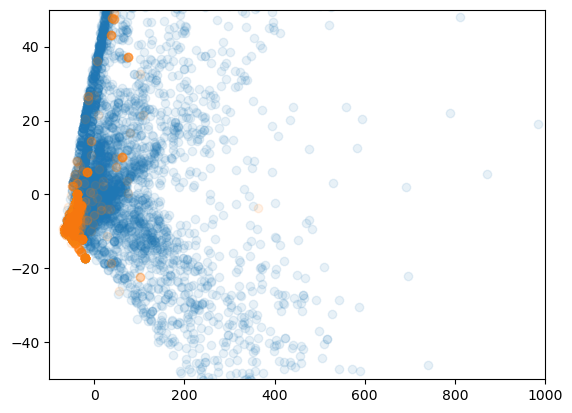

In [184]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_test =  pca.fit(X_train).transform(X_test)
X_train = pca.fit(X_train).transform(X_train)
plt.scatter(X_train[y_train.values.ravel()==False, 0], X_train[y_train.values.ravel()==False, 1], alpha=0.1)
plt.scatter(X_train[y_train.values.ravel()==True, 0], X_train[y_train.values.ravel()==True, 1], alpha=0.1)
f = X_train[y_train.values.ravel()==False, 0].shape[0]
t = X_train[y_train.values.ravel()==True, 0].shape[0]
#plt.scatter(X_train[y_train.values.ravel()==False, 0], np.ones(f), alpha=0.05)
#plt.scatter(X_train[y_train.values.ravel()==True, 0], np.ones(t), alpha=0.05)
plt.xlim([-100, 1000])
plt.ylim([-50, 50])

In [186]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=1)
knn_clf.fit(X_train, y_train)
y_test_predicted = knn_clf.predict(X_test).reshape(-1,1)
print('Accuracy: %f%%' % (metrics.accuracy_score(y_test, y_test_predicted)*100))
compute_scores(y_test, y_test_predicted)

/Users/mattiarosso/opt/anaconda3/envs/malis/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy: 99.109352%
False positive: 10
True positive: 1102
False negative: 8
True negative: 901
False Negative Rate: 0.720721%


In [185]:
from sklearn import svm
svm_clf = svm.SVC()
svm_clf.fit(X_train, y_train)
y_test_predicted = svm_clf.predict(X_test).reshape(-1,1)
print('Accuracy: %f%%' % (metrics.accuracy_score(y_test, y_test_predicted)*100))
compute_scores(y_test, y_test_predicted)

/Users/mattiarosso/opt/anaconda3/envs/malis/lib/python3.8/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 87.382484%
False positive: 208
True positive: 1063
False negative: 47
True negative: 703
False Negative Rate: 4.234234%


In [87]:
from sklearn.naive_bayes import GaussianNB
gnb_clf = GaussianNB()
gnb_clf.fit(X_train, y_train)
y_test_predicted = gnb_clf.predict(X_test).reshape(-1,1)
print('Accuracy: %f%%' % (metrics.accuracy_score(y_test, y_test_predicted)*100))
compute_scores(y_test, y_test_predicted)

Accuracy: 81.939634%
False positive: 331
True positive: 1076
False negative: 34
True negative: 580
False Negative Rate: 3.063063%


/Users/mattiarosso/opt/anaconda3/envs/malis/lib/python3.8/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [29]:
from sklearn.ensemble import RandomForestClassifier
tree_clf = RandomForestClassifier()
tree_clf.fit(X_train, y_train)
y_test_predicted = tree_clf.predict(X_test).reshape(-1,1)
accuracy = (y_test.values == y_test_predicted).sum() / len(y_test_predicted)
error_rate = 1-accuracy
print('Error rate: %f%%' % (error_rate*100))
print('Accuracy: %f%%' % (accuracy*100))

/var/folders/48/1_svc68j0_b2js686ls_zqhh0000gn/T/ipykernel_13471/2742071699.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  tree_clf.fit(X_train, y_train)


Error rate: 0.098961%
Accuracy: 99.901039%
